#### ─────────────────────────────────────────────────────────────────────────────────────────

## 모든 주식 종목의 특정 기간 동안 주식 데이터를 stock_total에 저장
### 약 10분 이상 소요

In [3]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# API URL
url = "http://data-dbg.krx.co.kr/svc/apis/sto/stk_bydd_trd"

# 인증키 설정
auth_key = "956087495A1D4769A88B0F3411D0890EF02445EB"  # 제공받은 인증키로 대체하세요

# 헤더작성
headers = {
    "AUTH_KEY": auth_key,
}

# 기간 설정
start_date = datetime(2023, 11, 12)
end_date = datetime(2024, 11, 12)

# 모든 종목의 데이터를 저장할 딕셔너리 생성
stock_total = {}

# 기간 동안 데이터 수집
current_date = start_date
while current_date <= end_date:
    bas_d = current_date.strftime("%Y%m%d")

    # 요청 파라미터 설정
    params = {
        "basDd": bas_d
    }

    # 현재 진행 상황 출력
    if current_date.day == 1:
        print(f"현재 진행 중: {current_date.strftime('%Y년 %m월')}")

    # API 요청
    response = requests.get(url, headers=headers, params=params)

    # 응답 확인 및 데이터 처리
    if response.status_code == 200:
        data = response.json()  # JSON 형식으로 변환
        if 'OutBlock_1' in data and data['OutBlock_1']:
            df_stock = pd.DataFrame(data['OutBlock_1'])[['BAS_DD', 'ISU_CD', 'ISU_NM', 'SECT_TP_NM', 'TDD_CLSPRC',
                                                         'ACC_TRDVOL', 'ACC_TRDVAL', 'MKTCAP', 'LIST_SHRS']]
            
            # 모든 종목에 대해 데이터 저장
            for _, row in df_stock.iterrows():
                stock_name = row['ISU_NM']
                stock_data = row[['BAS_DD', 'SECT_TP_NM', 'TDD_CLSPRC', 'ACC_TRDVOL', 'ACC_TRDVAL', 'MKTCAP', 'LIST_SHRS']]

                # 딕셔너리에 해당 종목이 없으면 새로운 리스트 생성
                if stock_name not in stock_total:
                    stock_total[stock_name] = []

                # 해당 종목의 데이터 추가
                stock_total[stock_name].append(stock_data)
    else:
        print(f"Error {response.status_code}: {response.text}")

    # 다음 날짜로 이동
    current_date += timedelta(days=1)

# 최종 데이터 저장 및 확인
for stock_name in stock_total:
    stock_total[stock_name] = pd.DataFrame(stock_total[stock_name])

# 특정 종목의 데이터 예시 출력
print(stock_total['삼성전자'])


현재 진행 중: 2023년 12월
현재 진행 중: 2024년 01월
현재 진행 중: 2024년 02월
현재 진행 중: 2024년 03월
현재 진행 중: 2024년 04월
현재 진행 중: 2024년 05월
현재 진행 중: 2024년 06월
현재 진행 중: 2024년 07월
현재 진행 중: 2024년 08월
현재 진행 중: 2024년 09월
현재 진행 중: 2024년 10월
현재 진행 중: 2024년 11월
       BAS_DD SECT_TP_NM TDD_CLSPRC ACC_TRDVOL     ACC_TRDVAL  \
446  20231113          -      70400    9246919   653603022224   
446  20231114          -      70800    9567984   678176565400   
446  20231115          -      72200   20148677  1449276387300   
446  20231116          -      72800   15860451  1151617384100   
446  20231117          -      72500   11494644   834898662931   
..        ...        ...        ...        ...            ...   
451  20241106          -      57300   22092218  1262148460900   
451  20241107          -      57500   17043102   982114998400   
451  20241108          -      57000   13877396   799664427482   
451  20241111          -      55000   29811326  1654820869900   
451  20241112          -      53000   37962881  203779086

In [6]:
stock_total['삼성물산']

,BAS_DD,SECT_TP_NM,TDD_CLSPRC,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,LIST_SHRS
438,20231113,-,116700,186949,21659081400,21658547889000,185591670
438,20231114,-,115800,226137,26370206200,21491515386000,185591670
438,20231115,-,118300,315982,37180539000,21955494561000,185591670
438,20231116,-,117800,123581,14512128100,21862698726000,185591670
438,20231117,-,117900,115136,13500989800,21881257893000,185591670
...,...,...,...,...,...,...,...
444,20241106,-,121400,178569,21590519700,21582990589800,177784107
444,20241107,-,122400,191478,23379868900,21760774696800,177784107
444,20241108,-,123100,179265,22121494100,21885223571700,177784107
444,20241111,-,121300,184418,22379950800,21565212179100,177784107


### 위 항목은 삼성물산의 결과 값

#### ─────────────────────────────────────────────────────────────────────────────────────────

#### ─────────────────────────────────────────────────────────────────────────────────────────

## 주식 데이터의 변화량을 가지고 그 다음날 종가가 오를지 안오를지 예측하는 모델
### 8개월을 학습시키고, 나머지 4개월을 테스트하여 점수 측정

### 아래처럼 함수처럼 진행했고 예시항목 '동남합성' 항목의 정확도

In [60]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from collections import Counter
plt.rcParams['font.family'] ='Malgun Gothic'

def predict_updown(name):
    if name in stock_total:
        stock_df = stock_total[name]
        stock_df['BAS_DD'] = pd.to_datetime(stock_df['BAS_DD'], format='%Y%m%d')
        stock_df['TDD_CLSPRC'] = pd.to_numeric(stock_df['TDD_CLSPRC'], errors='coerce')
        stock_df['ACC_TRDVOL'] = pd.to_numeric(stock_df['ACC_TRDVOL'], errors='coerce')
        stock_df['ACC_TRDVAL'] = pd.to_numeric(stock_df['ACC_TRDVAL'], errors='coerce')
        stock_df['MKTCAP'] = pd.to_numeric(stock_df['MKTCAP'], errors='coerce')
        stock_df['LIST_SHRS'] = pd.to_numeric(stock_df['LIST_SHRS'], errors='coerce')
        
        # 변화량 계산
        stock_df['price_change'] = stock_df['TDD_CLSPRC'].diff()
        stock_df['trdvol_change'] = stock_df['ACC_TRDVOL'].diff()
        stock_df['trdval_change'] = stock_df['ACC_TRDVAL'].diff()
        stock_df['mktcap_change'] = stock_df['MKTCAP'].diff()
        stock_df['list_shrs_change'] = stock_df['LIST_SHRS'].diff()

        # 상승/하락 라벨 생성 (내일 종가가 오를지 내릴지 예측하기 위한 라벨)
        stock_df['target'] = (stock_df['TDD_CLSPRC'].shift(-1) > stock_df['TDD_CLSPRC']).astype(int)

        # 결측값 제거
        stock_df = stock_df.dropna()

        # 피처 및 라벨 정의
        features = ['price_change', 'trdvol_change', 'trdval_change', 'mktcap_change', 'list_shrs_change']
        X = stock_df[features]
        y = stock_df['target']
        

        # 데이터셋 분할 (8개월 학습, 4개월 테스트)
        train_size = int(len(stock_df) * 8 / 12)
        X_train, y_train = X[:train_size], y.iloc[:train_size]
        X_test, y_test = X[train_size:], y.iloc[train_size:]

        # 매일의 데이터를 사용하여 학습 및 예측
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

    else:
        print(f"종목 '{name}'의 데이터가 존재하지 않습니다.")
    

print(predict_updown('동남합성'))

0.4691358024691358


#### ─────────────────────────────────────────────────────────────────────────────────────────

## 전체 평균 정확도는 약 53%
### 아래는 정확도가 높은 10개항목과 정확도가 낮은 10개 항목

전체 종목의 평균 정확도: 0.53


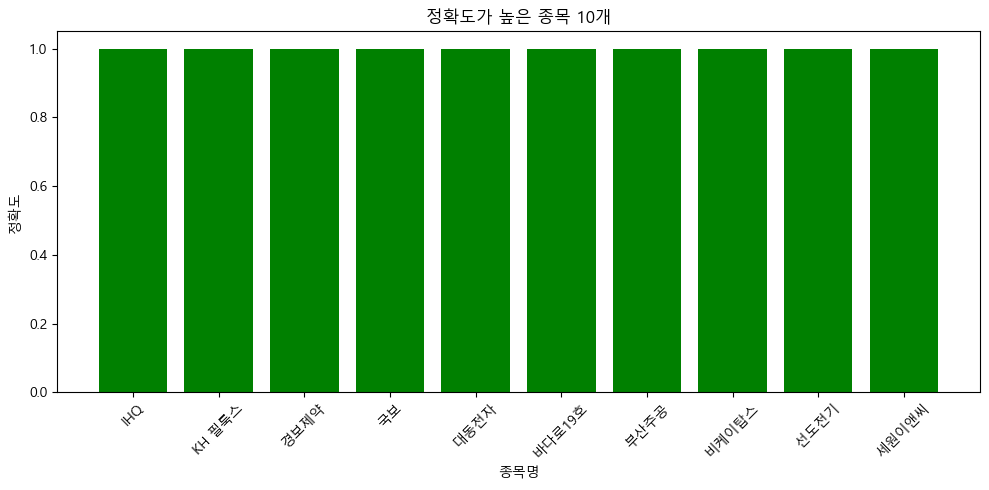

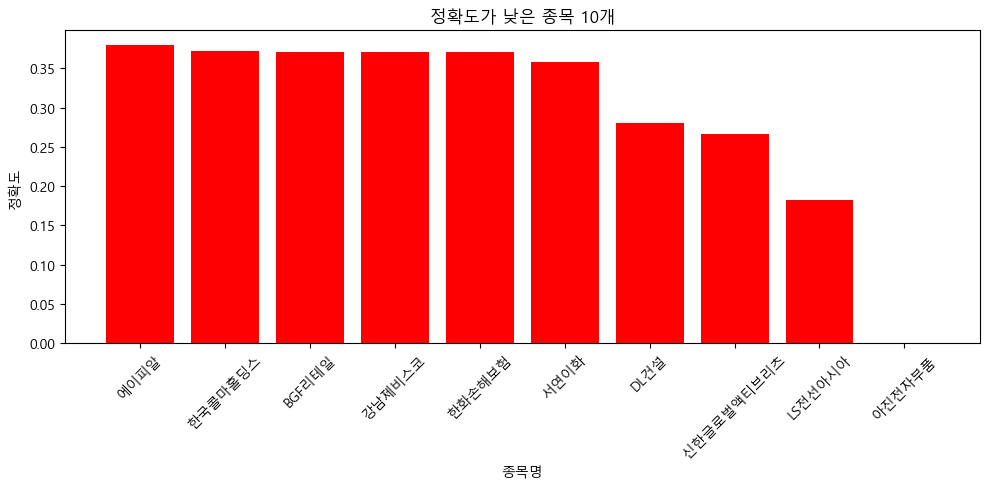

In [61]:
accuracies = {}
for stock_name in stock_total.keys():
    accuracy = predict_updown(stock_name)
    if accuracy is not None:
        accuracies[stock_name] = accuracy

    # 평균 정확도 계산
avg_accuracy = sum(accuracies.values()) / len(accuracies)
print(f"전체 종목의 평균 정확도: {avg_accuracy:.2f}")

    # 정확도가 높은 종목 10개와 낮은 종목 10개 시각화
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
top_10 = sorted_accuracies[:10]
bottom_10 = sorted_accuracies[-10:]

    # 정확도가 높은 종목 10개 그래프
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in top_10], [x[1] for x in top_10], color='g')
plt.title('정확도가 높은 종목 10개')
plt.xlabel('종목명')
plt.ylabel('정확도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    # 정확도가 낮은 종목 10개 그래프
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in bottom_10], [x[1] for x in bottom_10], color='r')
plt.title('정확도가 낮은 종목 10개')
plt.xlabel('종목명')
plt.ylabel('정확도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ─────────────────────────────────────────────────────────────────────────────────────────

## 시차 총액이 높은 주요 종목들의 정확도 결과

주요 10개 주식 종목의 점수
삼성전자: 0.5432098765432098
SK하이닉스: 0.5555555555555556
LG에너지솔루션: 0.6296296296296297
삼성바이오로직스: 0.4567901234567901
현대차: 0.4691358024691358
기아: 0.4691358024691358
셀트리온: 0.5185185185185185
NAVER: 0.5061728395061729
카카오: 0.41975308641975306
KB금융: 0.4444444444444444


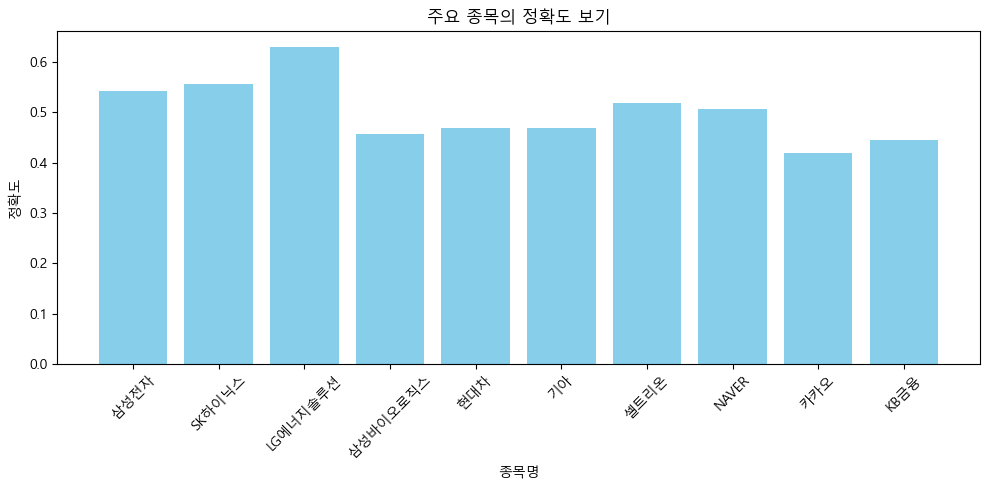

In [69]:
nname = ['삼성전자', 'SK하이닉스', 'LG에너지솔루션', '삼성바이오로직스', '현대차', '기아', '셀트리온', 'NAVER', '카카오', 'KB금융']
yp = []
print("주요 10개 주식 종목의 점수")
for i in nname:
    score = predict_updown(i)
    yp.append(score)
    if score is not None:
        print(f"{i}: {score}")
    else:
        print(f"{i}: 예측을 수행할 수 없습니다.")
        
        

plt.figure(figsize=(10, 5))
plt.bar(nname, yp, color='skyblue')
plt.title('주요 종목의 정확도 보기')
plt.xlabel('종목명')
plt.ylabel('정확도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()